# **GRIP : The Sparks Foundation**

# Data Science and Business Analytics Intern

# Author : Riyanka Karmakar

# Task 1 : Prediction using Supervised ML

**Objective : Predict the percentage of a student based on the no. of study hours. Predict the score if the student studies for 9.25 hours/day.**

**The task is a simple linear regression task using two variables where the feature is the no. of hours studied and the target value is the percentage score.**

In [21]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Reading the data from remote URL in .csv file format**

In [22]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

**Exploring the data**

In [23]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


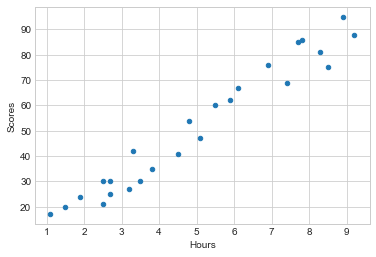

In [26]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

In [27]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [28]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [29]:
hours=data['Hours']
scores=data['Scores']

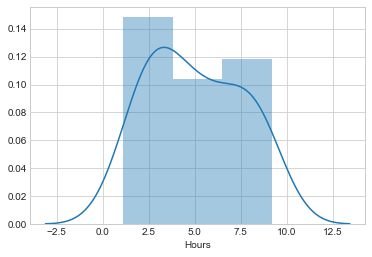

In [30]:
sns.distplot(hours)

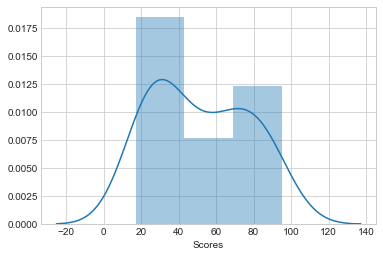

In [31]:
sns.distplot(scores)

**Linear Regression**

In [32]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values 

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [34]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

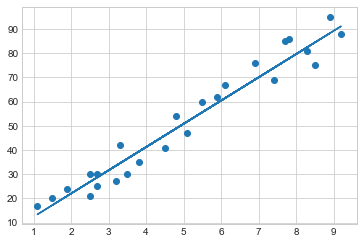

In [35]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [36]:
y_pred=reg.predict(x_test)

In [37]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Predicted,Target
0,88.211394,95
1,28.718453,30
2,69.020122,76
3,39.273652,35
4,13.365436,17


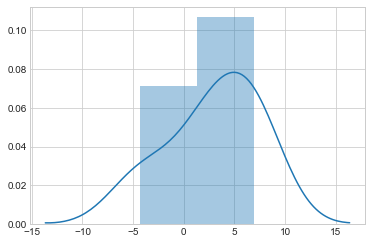

In [38]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

**What will be predicted score if a student studies for 9.25 hours/day?**

In [39]:
hr=9.25
s=reg.predict([[hr]])
print("If a student studies for ",hr," hours per day then the student will score ",s,"% in the examination.")

If a student studies for  9.25  hours per day then the student will score  [91.56986604] % in the examination.


**Model Evaluation**

In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score: ',r2_score(y_test,y_pred))

Mean Absolute Error:  4.5916495300630285
R2 Score:  0.971014141329942


# **Thank You!**